In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
## Importing the data

df = pd.read_csv('heart_failure_clinical_records_dataset.csv',sep = ',')

print(f'No of records in the data {df.shape}')

df.head()

No of records in the data (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
## Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


C:\Users\sredekar\AppData\Local\Temp\ipykernel_17916\3158146116.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color='blue')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


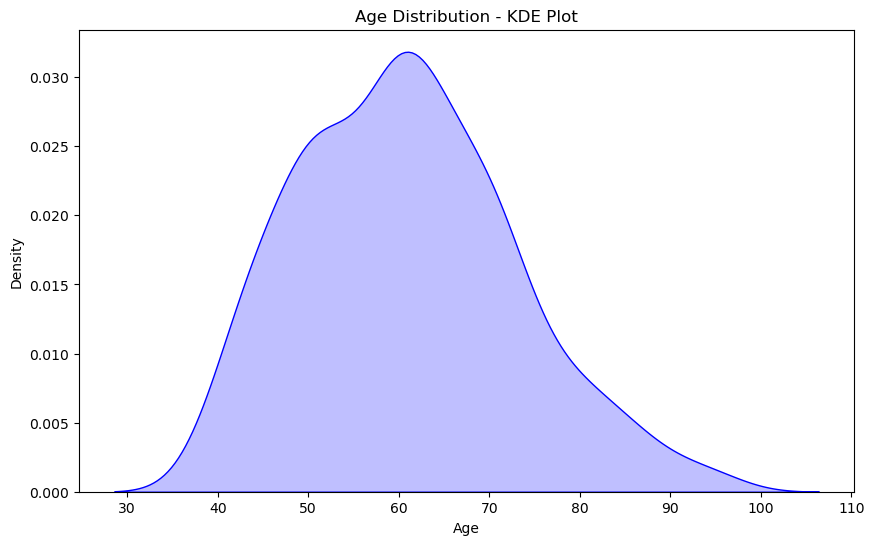

In [13]:
# What is the distribution of age among heart failure patients in the dataset?

# Plotting the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], shade=True, color='blue')

# Adding title and labels
plt.title('Age Distribution - KDE Plot')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the plot
plt.show()


The age is normally distrubuted

C:\Users\sredekar\AppData\Local\Temp\ipykernel_17916\516906959.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_by_age_bin = df.groupby('age_bin')['DEATH_EVENT'].mean()


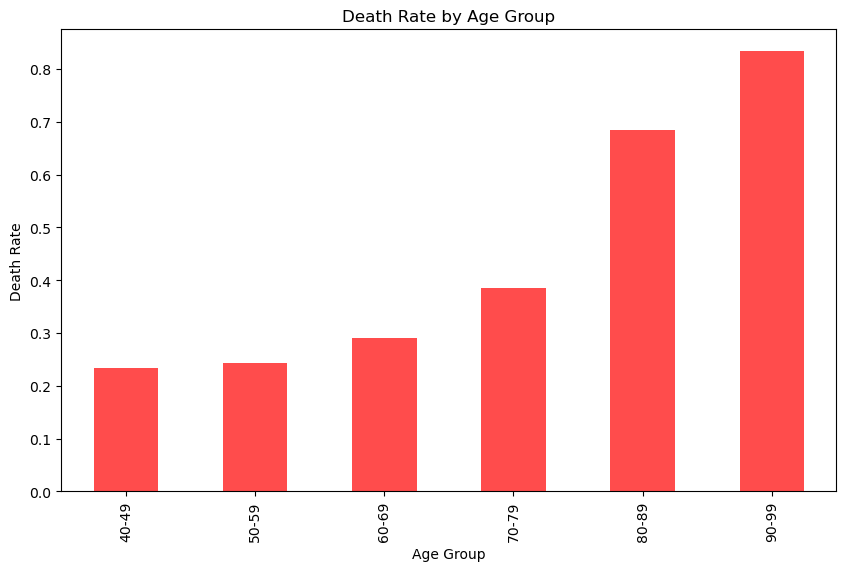

In [47]:
#   How does the death rate vary with age?
# Define age bins
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Add age bins to DataFrame
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate death rate for each age bin
death_rate_by_age_bin = df.groupby('age_bin')['DEATH_EVENT'].mean()

# Plotting the death rate by age bin
plt.figure(figsize=(10, 6))
death_rate_by_age_bin.plot(kind='bar', color='red', alpha=0.7)

# Adding title and labels
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')

# Display the plot
plt.show()


We can see with higher age there is high risk of death 


In [37]:
# What is the percentage of male and female patients in the dataset?
sex_percentage = df['sex'].value_counts(normalize=True) * 100
print(f'Percentage of Male = 1 and Female = 1 patients {round(sex_percentage,2)}')

Percentage of Male = 1 and Female = 1 patients sex
1    64.88
0    35.12
Name: proportion, dtype: float64


C:\Users\sredekar\AppData\Local\Temp\ipykernel_17916\1188138874.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_by_age_bin = df.groupby('age_bin')['platelets'].sum()


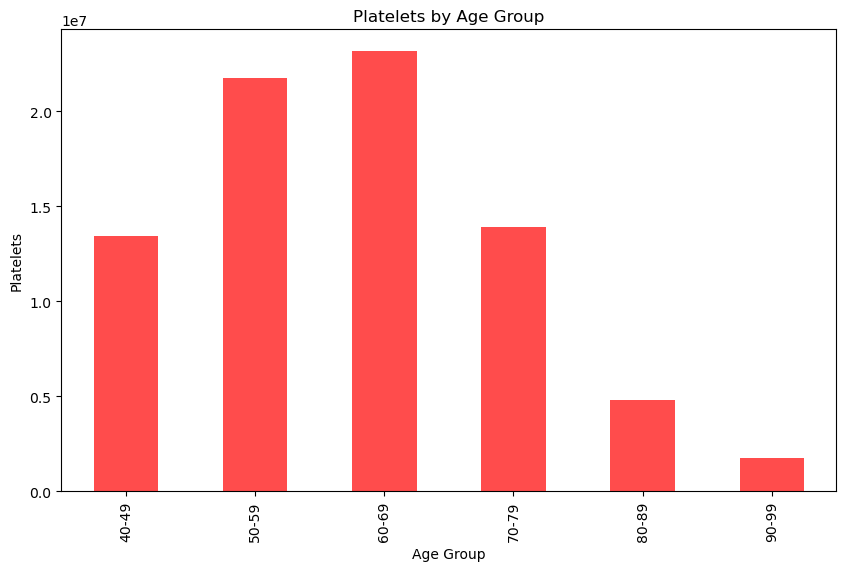

In [52]:
# How does the platelet count vary among different age groups?

# Define age bins
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Add age bins to DataFrame
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate death rate for each age bin
death_rate_by_age_bin = df.groupby('age_bin')['platelets'].sum()

# Plotting the death rate by age bin
plt.figure(figsize=(10, 6))
death_rate_by_age_bin.plot(kind='bar', color='red', alpha=0.7)

# Adding title and labels
plt.title('Platelets by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Platelets')

# Display the plot
plt.show()

We can see with increase in age platelets are getting drop. one thing to notice it was higher in 60-70 age but less in 40-50 age group

In [53]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_bin'],
      dtype='object')

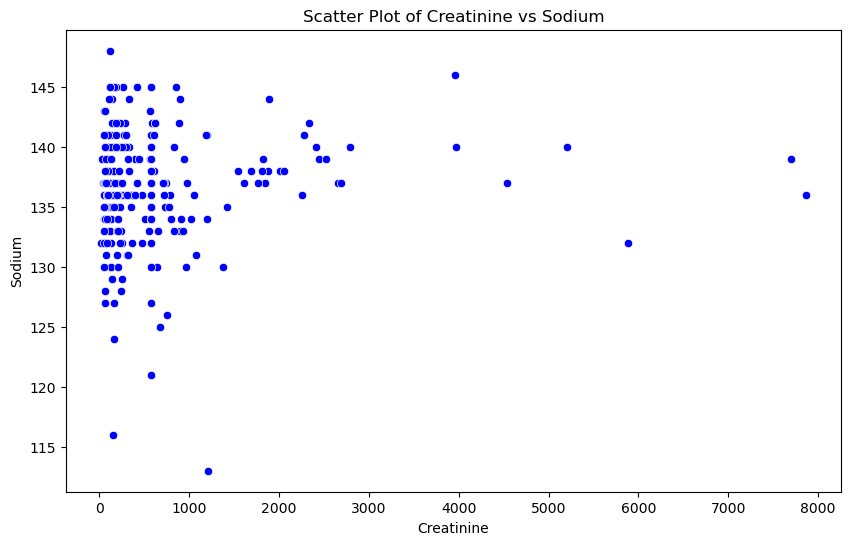

In [54]:
# Is there a correlation between creatinine and sodium levels in the blood?


# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=df, color='blue')

# Adding title and labels
plt.title('Scatter Plot of Creatinine vs Sodium')
plt.xlabel('Creatinine')
plt.ylabel('Sodium')

# Display the plot
plt.show()



We can see at lower Creatinine levels Sodium levels are high 

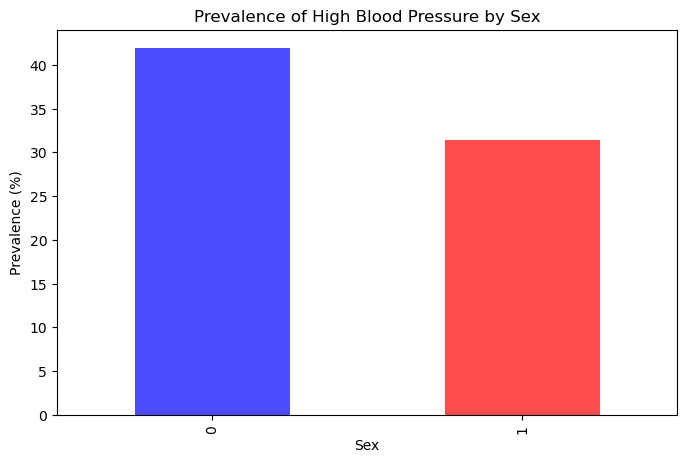

sex
0    41.904762
1    31.443299
Name: high_blood_pressure, dtype: float64


In [61]:
# How does the prevalence of high blood pressure differ between male and female patients?

import pandas as pd
import matplotlib.pyplot as plt

prevalence = df.groupby('sex')['high_blood_pressure'].mean() * 100

plt.figure(figsize=(8, 5))
prevalence.plot(kind='bar', color=['blue', 'red'], alpha=0.7)

plt.title('Prevalence of High Blood Pressure by Sex')
plt.xlabel('Sex')
plt.ylabel('Prevalence (%)')
plt.show()

print(prevalence)


Female are more prone to high bllod pressure than mean

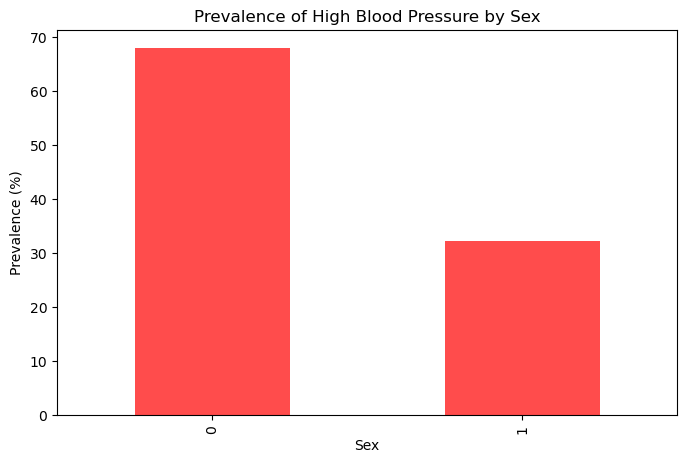

smoking
0    67.892977
1    32.107023
Name: proportion, dtype: float64


In [76]:
# what is the relatIonship between smoking habits and the occurrence of heart faliure

plt.figure(figsize=(8, 5))
smoking = df['smoking'].value_counts(normalize = True)*100

smoking.plot(kind='bar', color=['red'], alpha=0.7)

plt.title('Prevalence of High Blood Pressure by Sex')
plt.xlabel('Sex')
plt.ylabel('Prevalence (%)')
plt.show()

print(smoking)


Out of total dataset of Heart faliure most of the cases are of Non-smokers 

C:\Users\sredekar\AppData\Local\Temp\ipykernel_17916\318480232.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = df.groupby('age_group')['DEATH_EVENT'].sum()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


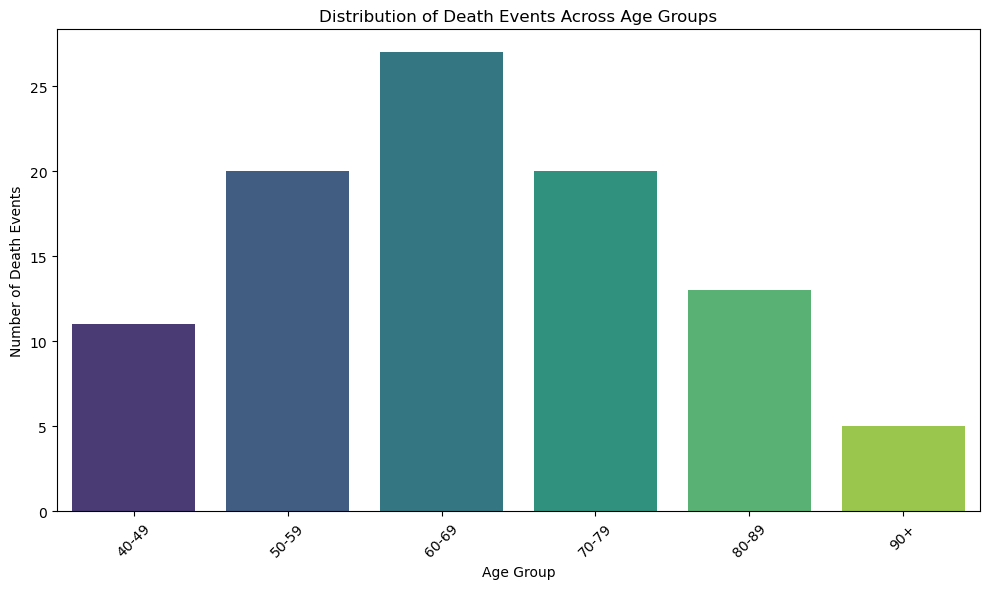

In [80]:
# distribution of death events across different age groups

bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

death_counts = df.groupby('age_group')['DEATH_EVENT'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=death_counts.index, y=death_counts.values, palette='viridis')
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distrubution of age is across death rate is normally distrubuted 

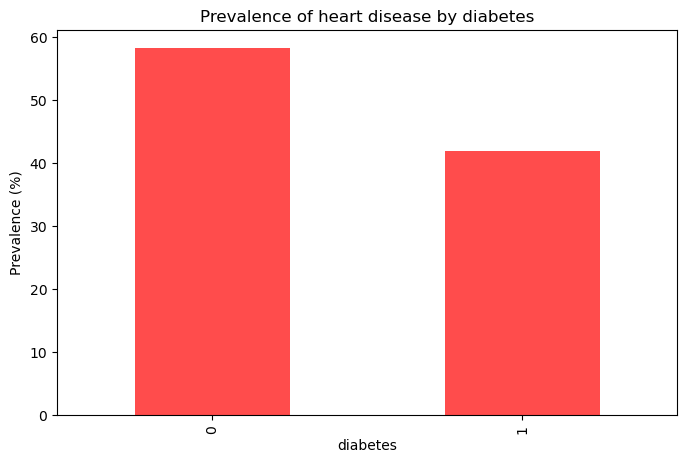

diabetes
0    58.19398
1    41.80602
Name: proportion, dtype: float64


In [83]:
# Is there any significant difference in incidence or risk of heart disease between patients with and without diabetes?

plt.figure(figsize=(8, 5))
diabetes = df['diabetes'].value_counts(normalize = True)*100

diabetes.plot(kind='bar', color=['red'], alpha=0.7)

plt.title('Prevalence of heart disease by diabetes')
plt.xlabel('diabetes')
plt.ylabel('Prevalence (%)')
plt.show()

print(diabetes)

People with diabetes does seems to have major effect on Heart dieases

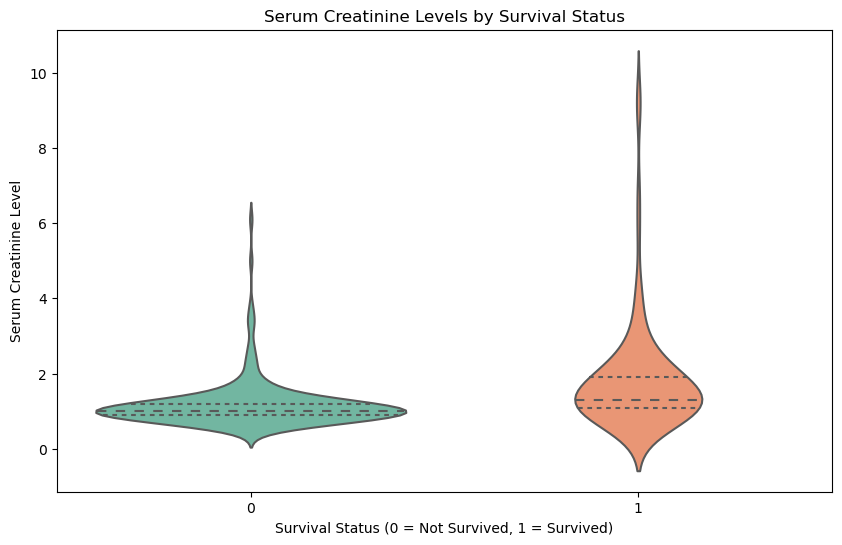

In [88]:
# How does the serum creatinine level vary between patients who survived and those who did not?

plt.figure(figsize=(10, 6))
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data=df, palette='Set2', inner='quartile')
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Serum Creatinine Level')
plt.show()



We can see that Higher serum creatinine level leads to a death event 
